In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys, os
import pandas as pd

sys.path.append('C:\\Users\\mtr22\\Code\\liGAN')
import params
import job_scripts

In [8]:
expt_dir = 'D:\\net\\pulsar\\home\\koes\\mtr22\\gan\\train_molport\\loss_weights\\conv_fitting\\'
job_params_file = expt_dir + 'job.params'
job_template_file = expt_dir + 'csb_fit_cmd.sh'
job_output_file = expt_dir + 'conv_fitting.gen_metrics'
job_name_format = 'fit_{gen_options}_{threshold}_{peak_value}_{min_dist}_{interm_gd_iters}_{final_gd_iters}'

In [11]:
job_params = params.ParamSpace.from_file(
    job_params_file, format=job_name_format.format
)

for d in job_params.dims:
    print(d, '=', job_params[d])

ligan_dir = ['/net/pulsar/home/koes/mtr22/gan']
data_dir = ['../../data']
model_dir = ['../../models']
weights_dir = ['../weights']
data_root = ['/net/pulsar/home/koes/mtr22/molport']
data_name = ['molportFULL_rand_test0']
data_model_name = ['data_48_0.5']
train_iter = [100000]
gen_model_name = ['gen_e_0.1_1']
disc_model_name = ['disc_x_10']
train_data_name = ['molportFULL_rand_']
train_fold = [0]
train_seed = [0]
n_samples = [10]
gen_options = ['rM', 'rMl', 'rcM', 'rcMl']
n_atoms_detect = [20]
threshold = [0.5, 0.4, 0.3]
peak_value = [1.4, 1.5, 1.6]
min_dist = [1.5]
interm_gd_iters = [10, 5]
final_gd_iters = [100]
learning_rate = [0.01, 0.02, 0.05]
beta1 = [0.9]
beta2 = [0.999]
weight_decay = [0.0]


In [12]:
job_scripts.write_job_scripts(
    expt_dir,
    job_template_file,
    job_params,
    print_=True,
)

KeyError: 'M'

In [16]:
def read_csv_files(csv_files, **kwargs):
    dfs = []
    for csv_file in csv_files:
        df = pd.read_csv(csv_file, **kwargs)
        csv_dir, csv_base = os.path.split(csv_file)
        csv_name, csv_ext = os.path.splitext(csv_base)
        df['csv_dir'] = csv_dir
        df['csv_name'] = csv_name
        df['csv_ext'] = csv_ext
        dfs.append(df)
    return pd.concat(dfs)

df = read_csv_files([job_output_file], sep=' ')
df

c:\users\mtr22\code\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (55) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Unnamed: 0,lig_name,sample_idx,lig_norm,lig_variance,lig_gen_norm,lig_gen_variance,lig_gen_L2_loss,lig_gen_L1_loss,lig_latent_norm,...,lig_gen_fit_add_RMSD_min,lig_gen_fit_add_dE_ref,lig_gen_fit_add_min_dE_ref,lig_gen_fit_add_RMSD_ref,lig_gen_fit_add_min_RMSD_ref,job_name,array_idx,csv_dir,csv_name,csv_ext
0,0,4899359_15,0,37.799480,NaN,37.258518,NaN,45.585159,1151.792480,31.164125,...,0.000000e+00,7.630240e+05,-149.715661,NaN,NaN,fit_rcM_0.3_1.4_1.5_10_100_0.01,10,D:\net\pulsar\home\koes\mtr22\gan\train_molpor...,conv_fitting,.gen_metrics
1,1,4899359_15,1,37.799309,NaN,36.139595,NaN,62.456535,1247.517090,29.519711,...,0.000000e+00,NaN,NaN,NaN,NaN,fit_rcM_0.3_1.4_1.5_10_100_0.01,10,D:\net\pulsar\home\koes\mtr22\gan\train_molpor...,conv_fitting,.gen_metrics
2,2,4899359_15,2,37.799259,NaN,38.365757,NaN,40.251915,1121.637451,32.306622,...,8.564248e-08,9.234142e+08,-149.907966,NaN,NaN,fit_rcM_0.3_1.4_1.5_10_100_0.01,10,D:\net\pulsar\home\koes\mtr22\gan\train_molpor...,conv_fitting,.gen_metrics
3,3,4899359_15,3,37.799595,NaN,36.683289,NaN,59.982964,1231.764038,31.397776,...,5.275150e-01,2.289419e+10,-148.675677,NaN,NaN,fit_rcM_0.3_1.4_1.5_10_100_0.01,10,D:\net\pulsar\home\koes\mtr22\gan\train_molpor...,conv_fitting,.gen_metrics
4,4,4899359_15,4,37.799164,NaN,37.486607,NaN,48.852734,1118.830811,30.665058,...,0.000000e+00,1.996604e+04,-148.636238,NaN,NaN,fit_rcM_0.3_1.4_1.5_10_100_0.01,10,D:\net\pulsar\home\koes\mtr22\gan\train_molpor...,conv_fitting,.gen_metrics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28432,5,4899359_15,5,37.799480,NaN,36.488827,NaN,44.698715,1084.344238,30.371689,...,0.000000e+00,3.117409e+10,-145.624447,NaN,NaN,fit_rMl_0.5_1.6_1.5_5_100_0.05,10,D:\net\pulsar\home\koes\mtr22\gan\train_molpor...,conv_fitting,.gen_metrics
28433,6,4899359_15,6,37.799690,NaN,36.959217,NaN,42.334412,1133.289185,31.045122,...,0.000000e+00,8.872532e+03,-148.394455,NaN,NaN,fit_rMl_0.5_1.6_1.5_5_100_0.05,10,D:\net\pulsar\home\koes\mtr22\gan\train_molpor...,conv_fitting,.gen_metrics
28434,7,4899359_15,7,37.799599,NaN,39.396355,NaN,52.870682,1189.024414,30.539011,...,0.000000e+00,-2.978628e+01,-144.369881,NaN,NaN,fit_rMl_0.5_1.6_1.5_5_100_0.05,10,D:\net\pulsar\home\koes\mtr22\gan\train_molpor...,conv_fitting,.gen_metrics
28435,8,4899359_15,8,37.799316,NaN,38.759666,NaN,63.380005,1244.823853,29.529856,...,0.000000e+00,1.052435e+01,-145.792110,NaN,NaN,fit_rMl_0.5_1.6_1.5_5_100_0.05,10,D:\net\pulsar\home\koes\mtr22\gan\train_molpor...,conv_fitting,.gen_metrics


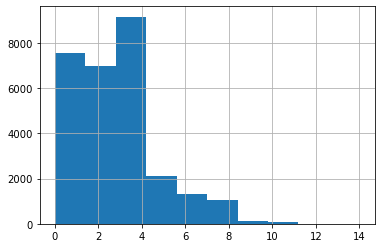

In [21]:
df['lig_gen_fit_type_diff'][
    df['job_name'] == ''
].hist()